In [16]:
# Setup

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import PoissonRegressor
from sklearn.metrics import accuracy_score

np.random.seed(42)

In [2]:
# Import data

dftrain = pd.read_csv("P:\Work in Progress\Mike Taylor\python\cs229\problem-sets\PS1\data\ds4_train.csv")
dftest = pd.read_csv("P:\Work in Progress\Mike Taylor\python\cs229\problem-sets\PS1\data\ds4_valid.csv")
# dfvalid = pd.read_csv("P:\Work in Progress\Mike Taylor\python\cs229\problem-sets\PS1\data\ds1_valid.csv")

In [4]:
dftrain.head(5)

,x_1,x_2,x_3,x_4,y
0,1.0,0.0,0.992047,0.325741,2463097
1,0.0,1.0,0.470463,0.371866,645481
2,0.0,1.0,0.496533,0.289853,474123
3,0.0,1.0,0.196377,0.694672,1542136
4,0.0,1.0,0.224992,0.880809,3705439


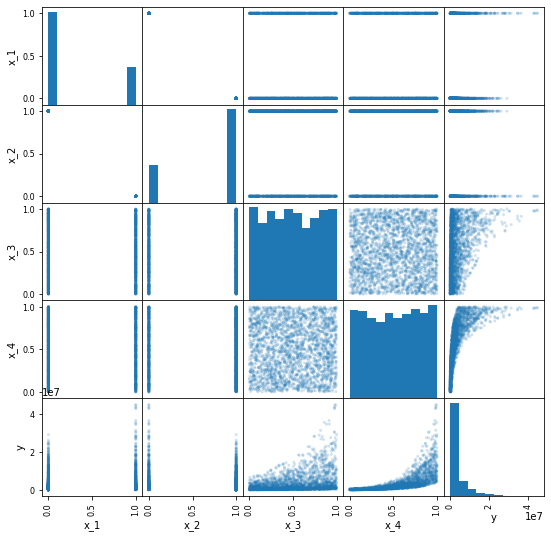

In [29]:
# from pandas.plotting import scatter_matrix
# df = pd.DataFrame(np.random.randn(1000, 4), columns = ['a', 'b', 'c', 'd'])
axes = pd.plotting.scatter_matrix(dftrain, alpha = 0.2, figsize = (9, 9), range_padding = 0.15) # , diagonal = 'kde')

In [18]:
y_train = dftrain["y"]
X_train = dftrain[["x_1","x_2","x_3","x_4"]]

y_test = dftest["y"]
X_test = dftest[["x_1","x_2","x_3","x_4"]]

y = pd.concat([y_train,y_test])
X = pd.concat([X_train,X_test])

In [41]:
poireg = PoissonRegressor()

for clf in (poireg,):
    clf.fit(X_train, y_train)
    # y_pred = clf.predict(X_test)
    # print(reg.__class__.__name__, accuracy_score(y_test, y_pred))
    # print(clf.score(X_test, y_pred))
    # test = pd.concat([y_pred,X_test], axis=1)
    
    pred_test = clf.predict(X_test)
    dfpred_test = pd.DataFrame(pred_test, index = X_test.index.values)
    xb_test = pd.concat([y_test,X_test,dfpred_test], axis=1)
    print(xb_test)
    

            y  x_1  x_2       x_3       x_4             0
0    12001739  0.0  1.0  0.836679  0.869895  1.200552e+07
1     2830841  0.0  1.0  0.435095  0.724055  2.830587e+06
2    20526976  1.0  0.0  0.579139  0.995261  2.053050e+07
3     1607014  0.0  1.0  0.377585  0.621478  1.606604e+06
4      479238  0.0  1.0  0.042245  0.498699  4.786442e+05
..        ...  ...  ...       ...       ...           ...
245   5727047  0.0  1.0  0.788795  0.723418  5.726461e+06
246  11596993  1.0  0.0  0.567625  0.870807  1.160324e+07
247    142261  0.0  1.0  0.367464  0.075704  1.426282e+05
248    400959  0.0  1.0  0.704603  0.157697  4.015385e+05
249   3276015  0.0  1.0  0.055511  0.929936  3.277787e+06

[250 rows x 6 columns]


In [44]:
import sklearn.metrics as metrics
def regression_results(y_true, y_pred):

    # Regression metrics
    explained_variance=metrics.explained_variance_score(y_true, y_pred)
    mean_absolute_error=metrics.mean_absolute_error(y_true, y_pred) 
    mse=metrics.mean_squared_error(y_true, y_pred) 
    mean_squared_log_error=metrics.mean_squared_log_error(y_true, y_pred)
    median_absolute_error=metrics.median_absolute_error(y_true, y_pred)
    r2=metrics.r2_score(y_true, y_pred)

    print('explained_variance: ', round(explained_variance,4))    
    print('mean_squared_log_error: ', round(mean_squared_log_error,4))
    print('r2: ', round(r2,4))
    print('MAE: ', round(mean_absolute_error,4))
    print('MSE: ', round(mse,4))
    print('RMSE: ', round(np.sqrt(mse),4))

In [47]:
regression_results(y_test,dfpred_test)

explained_variance:  1.0
mean_squared_log_error:  0.0
r2:  1.0
MAE:  1240.0317
MSE:  3758818.205
RMSE:  1938.7672


In [48]:
clf.coef_

array([ 0.25001593, -0.25001413,  2.00005187,  4.39997947])